

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 


---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

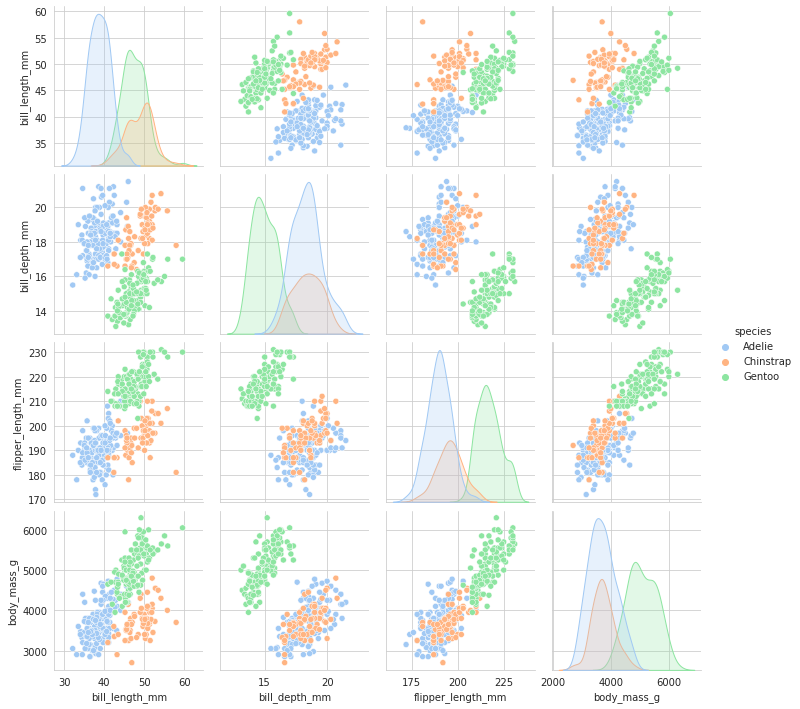

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** Gentoo é a espécie com maior body_mass_g e maior flipper_length_mm porém menor bill_depth_mm. Adelie é a espécie com maior bill_depth_mm, apesar de estar bem próximo de Chinstrap. Chinstrap vence no atributo bill_length_mm apesar de estar próximo a Gentoo, quase empate.

 - Sexo por espécie:

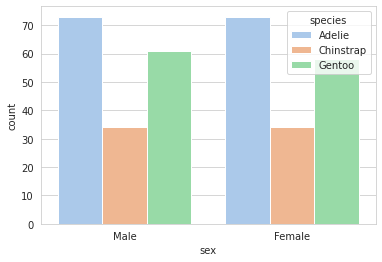

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** Proporção das espécies praticamente idênticos em relação ao sexo. Única diferença relevante é que existem um pouo mais de Gentoos machos do que fêmeas.

 - Ilha por espécie:

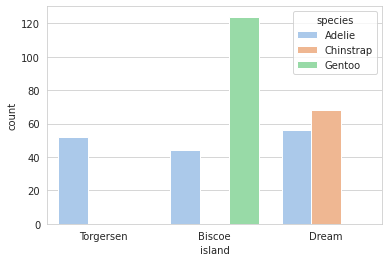

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** Adelie é a espécie que habita as 3 ilhas. Chinstrap habita apenas Dream mas existe lá em quantidade maior que Adelie. Gentoo habita apenas Biscoe island mas eles estão em proporção bem maior que Adelie.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [7]:
# resposta da questão 2.1

penguim.info()

#Apenas 2 elementos nos atributos bill_length_mm, bill_depth_mm, flipper_length_mm e body_mass_g com NaN. Basta eliminá-los
#Há também vários NaN em sex mas que não irão atrapalhar nossa base de dados

dataNew = penguim.dropna(subset=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"], axis=0)
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length

### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [8]:
# resposta da questão 2.2

#As variáveis categóricas nominais são species, island e sex. Não há variáveis ordinais nesse dataframe.
#Vamos manter espécie pois usaremos ela para trabalhar

#tratando o sex
dataNew['sex_m_nom'] = dataNew['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
dataNew['sex_f_nom'] = dataNew['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

dataNew.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_m_nom,sex_f_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,0,1
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,1,0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,0,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,0,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,0,0


In [9]:
#tratando island

dataNew['island_Dream_nom'] = dataNew['island'].apply(lambda island: 1 if island == 'Dream' else 0)
dataNew['island_Torgersen_nom'] = dataNew['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
dataNew['island_Biscoe_nom'] = dataNew['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)

dataNew.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_m_nom,sex_f_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0,1,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,0,1,0,1,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,1,0,0,1,0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,0,0,0,1,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,0,0,0,1,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,0,0,0,1,0


### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [10]:
# resposta da questão 2.3

dataFinal = dataNew.drop(columns=["island", "sex"],axis=1)

dataFinal.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_m_nom,sex_f_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,1,0,0,1,0


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [12]:
# resposta da questão 2.4

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    dataFinal.drop(['species'], axis=1), 
    dataFinal['species'], 
    test_size=1/3, 
    random_state=123
)

In [13]:
predictors_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_m_nom,sex_f_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
204,45.7,17.3,193.0,3600.0,0,1,1,0,0
297,51.1,16.3,220.0,6000.0,1,0,0,0,1
149,37.8,18.1,193.0,3750.0,1,0,1,0,0
79,42.1,19.1,195.0,4000.0,1,0,0,1,0
267,50.5,15.9,225.0,5400.0,1,0,0,0,1


In [14]:
predictors_train.shape

(228, 9)

In [15]:
predictors_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_m_nom,sex_f_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
182,40.9,16.6,187.0,3200.0,0,1,1,0,0
304,44.9,13.8,212.0,4750.0,0,1,0,0,1
334,46.2,14.1,217.0,4375.0,0,1,0,0,1
310,47.5,15.0,218.0,4950.0,0,1,0,0,1
171,49.2,18.2,195.0,4400.0,1,0,1,0,0


In [16]:
predictors_test.shape

(114, 9)

In [17]:
target_train.head()

204    Chinstrap
297       Gentoo
149       Adelie
79        Adelie
267       Gentoo
Name: species, dtype: object

In [18]:
target_train.shape

(228,)

In [19]:
target_test.head()

182    Chinstrap
304       Gentoo
334       Gentoo
310       Gentoo
171    Chinstrap
Name: species, dtype: object

In [20]:
target_test.shape

(114,)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 7 folhas

In [21]:
# resposta da questão 3.1
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(predictors_train, target_train)

model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'sex_m_nom', 'sex_f_nom', 'island_Dream_nom',
        'island_Torgersen_nom', 'island_Biscoe_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7fe84146ab90>}

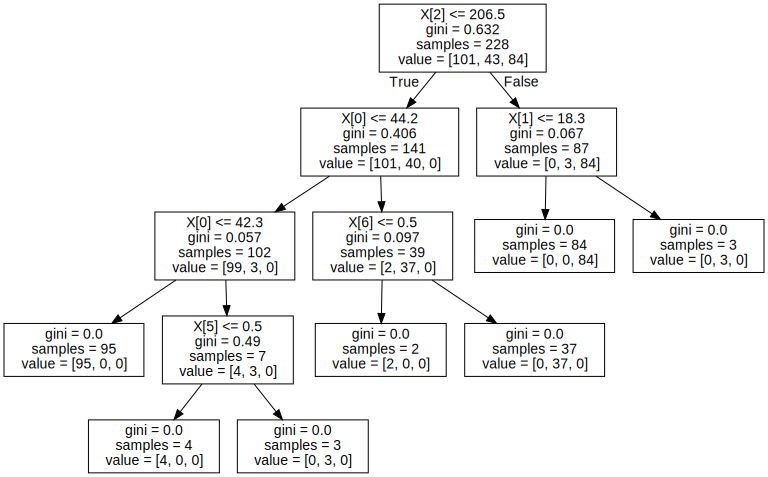

In [22]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(tree_data) 
graph

### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** Pelo gráfico de mapa de calor, é possível notar que 47 das espécies Adelie foram obtidos corretamente como o esperado, enquanto 2 foram registrados como Chinstrap e 1 como Gentoo. 
23 dos Chiinstrap foram identificados corretamente, enquanto 2 foram registrados como Adelie.
38 dos Gentoo foram identificados corretamente, enquanto 1 foi registrado como Adelie.

In [23]:
target_predicted = model.predict(predictors_test)

In [24]:
target_predicted[0:5]

array(['Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap'], dtype=object)

In [25]:
target_predicted.shape

(114,)

In [26]:
target_test[0:5]

182    Chinstrap
304       Gentoo
334       Gentoo
310       Gentoo
171    Chinstrap
Name: species, dtype: object

In [27]:
target_test.shape

(114,)

In [28]:
# resposta da questão 3.2.a

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[48  1  1]
 [ 1 24  0]
 [ 1  0 38]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


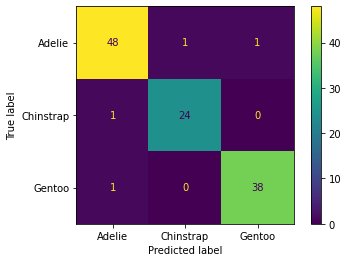

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, predictors_test, target_test)
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [30]:
# resposta da questão 3.2.b

from sklearn.metrics import accuracy_score

acuracia = accuracy_score(target_test, target_predicted)
print(f"{round(100 * acuracia, 2)}%")

96.49%


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [31]:
# resposta da questão 4.1

animal = np.array([38.2, 18.1, 185.0, 3950.0, 1, 0, 0, 0, 1])

especie = model.predict(animal.reshape(1, -1))
print(especie)

['Adelie']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


---